# 🎯 Tunable Ensemble for LLM Uncertainty (Advanced)

<div style="background-color: rgba(200, 200, 200, 0.1); padding: 20px; border-radius: 8px; margin-bottom: 20px; border: 1px solid rgba(127, 127, 127, 0.2); max-width: 97.5%; overflow-wrap: break-word;">
  <p style="font-size: 16px; line-height: 1.6">
Ensemble UQ methods combine multiple individual scorers to provide a more robust uncertainty estimate. They offer high flexibility and customizability, allowing you to tailor the ensemble to specific use cases. This ensemble can leverage any combination of black-box, white-box, or LLM-as-a-Judge scorers offered by <code>uqlm</code>. Below is a list of the available scorers:

#### Black-Box (Consistency) Scorers
*   Non-Contradiction Probability ([Chen & Mueller, 2023](https://arxiv.org/abs/2308.16175); [Lin et al., 2025](https://arxiv.org/abs/2305.19187); [Manakul et al., 2023](https://arxiv.org/abs/2303.08896))
*   Semantic Negentropy (based on [Farquhar et al., 2024](https://www.nature.com/articles/s41586-024-07421-0); [Kuhn et al., 2023](https://arxiv.org/pdf/2302.09664))
*   Exact Match ([Cole et al., 2023](https://arxiv.org/abs/2305.14613); [Chen & Mueller, 2023](https://arxiv.org/abs/2308.16175))
*   BERT-score ([Manakul et al., 2023](https://arxiv.org/abs/2303.08896); [Zheng et al., 2020](https://arxiv.org/abs/1904.09675))
*   BLUERT ([Sellam et al., 2020](https://arxiv.org/abs/2004.04696))
*   Normalized Cosine Similarity ([Shorinwa et al., 2024](https://arxiv.org/pdf/2412.05563); [HuggingFace](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2))

#### White-Box (Token-Probability-Based) Scorers
*   Minimum token probability ([Manakul et al., 2023](https://arxiv.org/abs/2303.08896))
*   Length-Normalized Joint Token Probability ([Malinin & Gales, 2021](https://arxiv.org/pdf/2002.07650))

#### LLM-as-a-Judge Scorers
*   Categorical LLM-as-a-Judge ([Manakul et al., 2023](https://arxiv.org/abs/2303.08896); [Chen & Mueller, 2023](https://arxiv.org/abs/2308.16175); [Luo et al., 2023](https://arxiv.org/pdf/2303.15621))
*   Continuous LLM-as-a-Judge ([Xiong et al., 2024](https://arxiv.org/pdf/2306.13063))
</p>
</div>
    
## 📊 What You'll Do in This Demo

<div style="display: flex; margin-bottom: 15px; align-items: center">
  <div style="background-color: #34a853; color: white; border-radius: 50%; width: 30px; height: 30px; display: flex; justify-content: center; align-items: center; margin-right: 15px; flex-shrink: 0"><strong>1</strong></div>
  <div>
    <p style="margin: 0; font-weight: bold"><a href=#section1>Set up LLM and prompts.</a></p>
    <p style="margin: 0; color: rgba(95, 99, 104, 0.8)">Set up LLM instance and load example data prompts.</p>
  </div>
</div>

<div style="display: flex; margin-bottom: 15px; align-items: center">
  <div style="background-color: #34a853; color: white; border-radius: 50%; width: 30px; height: 30px; display: flex; justify-content: center; align-items: center; margin-right: 15px; flex-shrink: 0"><strong>2</strong></div>
  <div>
    <p style="margin: 0; font-weight: bold"><a href=#section2>Tune Ensemble Weights</a></p>
    <p style="margin: 0; color: rgba(95, 99, 104, 0.8)">Tune the ensemble weights on a set of tuning prompts. You will execute a single <code>UQEnsemble.tune()</code> method that will generate responses, compute confidence scores, and optimize weights using a provided answer key corresponding to the provided questions.</p>
  </div>
</div>

<div style="display: flex; margin-bottom: 15px; align-items: center">
  <div style="background-color: #34a853; color: white; border-radius: 50%; width: 30px; height: 30px; display: flex; justify-content: center; align-items: center; margin-right: 15px; flex-shrink: 0"><strong>3</strong></div>
  <div>
    <p style="margin: 0; font-weight: bold"><a href=#section3>Generate LLM Responses and Confidence Scores with Tuned Ensemble.</a></p>
    <p style="margin: 0; color: rgba(95, 99, 104, 0.8)">Generate and score LLM responses to the example questions using the tuned <code>UQEnsemble()</code> object.</p>
  </div>
</div>

<div style="display: flex; margin-bottom: 25px; align-items: center">
  <div style="background-color: #34a853; color: white; border-radius: 50%; width: 30px; height: 30px; display: flex; justify-content: center; align-items: center; margin-right: 15px; flex-shrink: 0"><strong>4</strong></div>
  <div>
    <p style="margin: 0; font-weight: bold"><a href=#section4>Evaluate Hallucination Detection Performance.</a></p>
    <p style="margin: 0; color: rgba(95, 99, 104, 0.8)">Visualize LLM accuracy at different thresholds of the ensemble score that combines various scorers. Compute precision, recall, and F1-score of hallucination detection.</p>
  </div>
</div>

## ⚖️ Advantages & Limitations

<div style="display: flex; gap: 20px">
  <div style="flex: 1; background-color: rgba(0, 200, 0, 0.1); padding: 15px; border-radius: 8px; border: 1px solid rgba(0, 200, 0, 0.2)">
    <h3 style="color: #2e8b57; margin-top: 0">Pros</h3>
    <ul style="margin-bottom: 0">
      <li><strong>Highly Flexible:</strong> Versatile and adaptable to various tasks and question types.</li>
      <li><strong>Highly Customizable:</strong> Ensemble weights can be tuned for optimal performance on a specific use case.</li>
    </ul>
  </div>
  
  <div style="flex: 1; background-color: rgba(200, 0, 0, 0.1); padding: 15px; border-radius: 8px; border: 1px solid rgba(200, 0, 0, 0.2)">
    <h3 style="color: #b22222; margin-top: 0">Cons</h3>
    <ul style="margin-bottom: 0">
      <li><strong>Requires More Setup:</strong> Not quite "off-the-shelf"; requires some effort to configure and tune the ensemble.</li>
      <li><strong>Best for Advanced Users:</strong> Optimizing the ensemble requires a deeper understanding of the individual scorers.</li>
    </ul>
  </div>
</div>

In [1]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

from uqlm import UQEnsemble
from uqlm.utils import load_example_dataset, math_postprocessor, plot_model_accuracies, plot_filtered_accuracy, ranked_bar_plot

<a id='section1'></a>
## 1. Set up LLM and Prompts

In this demo, we will illustrate this approach using a set of math questions from the [GSM8K benchmark](https://github.com/openai/grade-school-math). To implement with your use case, simply **replace the example prompts with your data**.  

In [2]:
# Load example dataset (GSM8K)
gsm8k = load_example_dataset("gsm8k", n=200)
gsm8k.head()

Loading dataset - gsm8k...
Processing dataset...
Dataset ready!


,question,answer
0,Natalia sold clips to 48 of her friends in Apr...,72
1,Weng earns $12 an hour for babysitting. Yester...,10
2,Betty is saving money for a new wallet which c...,5
3,"Julie is reading a 120-page book. Yesterday, s...",42
4,James writes a 3-page letter to 2 different fr...,624


In [3]:
gsm8k_tune = gsm8k.iloc[0:100]
gsm8k_test = gsm8k.iloc[100:200]

In [4]:
# Define prompts
MATH_INSTRUCTION = "When you solve this math problem only return the answer with no additional text.\n"
tune_prompts = [MATH_INSTRUCTION + prompt for prompt in gsm8k_tune.question]
test_prompts = [MATH_INSTRUCTION + prompt for prompt in gsm8k_test.question]

In this example, we use `ChatVertexAI` and `AzureChatOpenAI` to instantiate our LLMs, but any [LangChain Chat Model](https://js.langchain.com/docs/integrations/chat/) may be used. Be sure to **replace with your LLM of choice.**

In [5]:
# import os
# import sys
# !{sys.executable} -m pip install python-dotenv
# !{sys.executable} -m pip install langchain-openai

# # User to populate .env file with API credentials. In this step, replace with your LLM of choice.
from dotenv import load_dotenv, find_dotenv
from langchain_openai import AzureChatOpenAI

load_dotenv(find_dotenv())
gpt = AzureChatOpenAI(deployment_name="gpt-4o", openai_api_type="azure", openai_api_version="2024-02-15-preview", temperature=1)

In [6]:
# import sys
# !{sys.executable} -m pip install langchain-google-vertexai
from langchain_google_vertexai import ChatVertexAI

gemini = ChatVertexAI(model="gemini-1.5-flash")

<a id='section2'></a>
## 2. Tune Ensemble

### `UQEnsemble()` - Ensemble of uncertainty scorers

#### 📋 Class Attributes

<table style="border-collapse: collapse; width: 100%; border: 1px solid rgba(127, 127, 127, 0.2);">
  <tr>
    <th style="background-color: rgba(200, 200, 200, 0.2); width: 20%; padding: 8px; text-align: left; border: 1px solid rgba(127, 127, 127, 0.2);">Parameter</th>
    <th style="background-color: rgba(200, 200, 200, 0.2); width: 25%; padding: 8px; text-align: left; border: 1px solid rgba(127, 127, 127, 0.2);">Type & Default</th>
    <th style="background-color: rgba(200, 200, 200, 0.2); width: 55%; padding: 8px; text-align: left; border: 1px solid rgba(127, 127, 127, 0.2);">Description</th>
  </tr>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">llm</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">BaseChatModel<br><code>default=None</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">A langchain llm `BaseChatModel`. User is responsible for specifying temperature and other relevant parameters to the constructor of the provided `llm` object.</td>
  </tr>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">scorers</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">List<br><code>default=None</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">Specifies which black-box, white-box, or LLM-as-a-Judge scorers to include in the ensemble. List containing instances of BaseChatModel, LLMJudge, black-box scorer names from ['semantic_negentropy', 'noncontradiction','exact_match', 'bert_score', 'cosine_sim'], or white-box scorer names from ["normalized_probability", "min_probability"]. If None, defaults to the off-the-shelf BS Detector ensemble by <a href="https://arxiv.org/abs/2308.16175">Chen & Mueller, 2023</a> which uses components ["noncontradiction", "exact_match","self_reflection"] with respective weights of [0.56, 0.14, 0.3].</td>
  </tr>   
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">device</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">str or torch.device<br><code>default="cpu"</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">Specifies the device that NLI model use for prediction. Only applies to 'semantic_negentropy', 'noncontradiction' scorers. Pass a torch.device to leverage GPU.</td>
  </tr>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">use_best</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">bool<br><code>default=True</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">Specifies whether to swap the original response for the uncertainty-minimized response among all sampled responses based on semantic entropy clusters. Only used if `scorers` includes 'semantic_negentropy' or 'noncontradiction'.</td>
  </tr>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">system_prompt</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">str or None<br><code>default="You are a helpful assistant."</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">Optional argument for user to provide custom system prompt for the LLM.</td>
  </tr>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">max_calls_per_min</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">int<br><code>default=None</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">Specifies how many API calls to make per minute to avoid rate limit errors. By default, no limit is specified.</td>
  </tr>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">use_n_param</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">bool<br><code>default=False</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">Specifies whether to use <code>n</code> parameter for <code>BaseChatModel</code>. Not compatible with all <code>BaseChatModel</code> classes. If used, it speeds up the generation process substantially when <code>num_responses</code> is large.</td>
  </tr>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">postprocessor</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">callable<br><code>default=None</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">A user-defined function that takes a string input and returns a string. Used for postprocessing outputs.</td>
  </tr>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">sampling_temperature</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">float<br><code>default=1</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">The 'temperature' parameter for LLM model to generate sampled LLM responses. Must be greater than 0.</td>
  </tr>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">weights</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">list of floats<br><code>default=None</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">Specifies weight for each component in ensemble. If None, and <code>scorers</code> is not None, and defaults to equal weights for each scorer. These weights get updated with <code>tune</code> method is executed.</td>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">nli_model_name</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">str<br><code>default="microsoft/deberta-large-mnli"</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">Specifies which NLI model to use. Must be acceptable input to <code>AutoTokenizer.from_pretrained()</code> and <code>AutoModelForSequenceClassification.from_pretrained()</code>.</td>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">scoring_templates</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">int<br><code>default=None</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">Specifies which off-the-shelf template to use for each judge. Four off-the-shelf templates offered: incorrect/uncertain/correct (0/0.5/1), incorrect/correct (0/1), continuous score (0 to 1), and likert scale score (1-5 scale, normalized to 0/0.25/0.5/0.75/1). These templates are respectively specified as 'true_false_uncertain', 'true_false', 'continuous', and 'likert'. If specified, must be of equal length to `judges` list. Defaults to 'true_false_uncertain' template used by Chen and Mueller (2023) for each judge.</td>
  </tr>
  <tr>
    <td style="font-weight: bold; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">return_responses</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">str<br><code>default="all"</code></td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">If a postprocessor is used, specifies whether to return only postprocessed responses, only raw responses, or both. Specified with 'postprocessed', 'raw', or 'all', respectively.</td>
  </tr>
  
</table>

#### 🔍 Parameter Groups

<div style="display: flex; gap: 20px; margin-bottom: 20px">
  <div style="flex: 1; padding: 10px; background-color: rgba(0, 100, 200, 0.1); border-radius: 5px; border: 1px solid rgba(0, 100, 200, 0.2);">
    <p style="font-weight: bold">🧠 LLM-Specific</p>
    <ul>
      <li><code>llm</code></li>
      <li><code>system_prompt</code></li>
      <li><code>sampling_temperature</code></li>
    </ul>
  </div>
  <div style="flex: 1; padding: 10px; background-color: rgba(0, 200, 0, 0.1); border-radius: 5px; border: 1px solid rgba(0, 200, 0, 0.2);">
    <p style="font-weight: bold">📊 Confidence Scores</p>
    <ul>
      <li><code>scorers</code></li>
      <li><code>weights</code></li>
      <li><code>use_best</code></li>
      <li><code>nli_model_name</code></li>
      <li><code>postprocessor</code></li>
    </ul>
  </div>
  <div style="flex: 1; padding: 10px; background-color: rgba(200, 150, 0, 0.1); border-radius: 5px; border: 1px solid rgba(200, 150, 0, 0.2);">
    <p style="font-weight: bold">🖥️ Hardware</p>
    <ul>
      <li><code>device</code></li>
    </ul>
  </div>
  <div style="flex: 1; padding: 10px; background-color: rgba(200, 0, 200, 0.1); border-radius: 5px; border: 1px solid rgba(200, 0, 200, 0.2);">
    <p style="font-weight: bold">⚡ Performance</p>
    <ul>
      <li><code>max_calls_per_min</code></li>
      <li><code>use_n_param</code></li>
    </ul>
  </div>
</div>

#### 💻 Usage Examples

```python
# Basic usage with default parameters
uqe = UQEnsemble(llm=llm)

# Using GPU acceleration
uqe = UQEnsemble(llm=llm, device=torch.device("cuda"))

# Custom scorer list
uqe = BlackBoxUQ(llm=llm, scorers=["bert_score", "exact_match", llm])

# High-throughput configuration with rate limiting
uqe = UQEnsemble(llm=llm, max_calls_per_min=200, use_n_param=True) 
```

In [7]:
import torch

# Set the torch device
if torch.cuda.is_available():  # NVIDIA GPU
    device = torch.device("cuda")
elif torch.backends.mps.is_available():  # macOS
    device = torch.device("mps")
else:
    device = torch.device("cpu")  # CPU
print(f"Using {device.type} device")

Using cuda device


In [8]:
scorers = [
    "exact_match",  # Measures proportion of candidate responses that match original response (black-box)
    "noncontradiction",  # mean non-contradiction probability between candidate responses and original response (black-box)
    "normalized_probability",  # length-normalized joint token probability (white-box)
    gpt,  # LLM-as-a-judge (self)
    gemini,  # LLM-as-a-judge (separate LLM)
]

uqe = UQEnsemble(
    llm=gpt,
    device=device,
    max_calls_per_min=1000,
    use_n_param=True,  # Set True if using AzureChatOpenAI or ChatOpenAI for faster generation
    scorers=scorers,
)

### 🔄 Class Methods: Tuning

![Sample Image](https://raw.githubusercontent.com/cvs-health/uqlm/develop/assets/images/uqensemble_tune.png)

<table style="border-collapse: collapse; width: 100%; border: 1px solid rgba(127, 127, 127, 0.2);">
  <tr>
    <th style="background-color: rgba(200, 200, 200, 0.2); width: 25%; padding: 8px; text-align: left; border: 1px solid rgba(127, 127, 127, 0.2);">Method</th>
    <th style="background-color: rgba(200, 200, 200, 0.2); width: 75%; padding: 8px; text-align: left; border: 1px solid rgba(127, 127, 127, 0.2);">Description & Parameters</th>
  </tr>
  <tr>
    <td style="font-weight: bold; vertical-align: top; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">UQEnsemble.tune</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">
      <p>Generate responses from provided prompts, grade responses with provided grader function, and tune ensemble weights. If weights and threshold objectives match, joint optimization will happen. Otherwise, sequential optimization will happen. If an optimization problem has fewer than three choice variables, grid search will happen.</p>
      <p><strong>Parameters:</strong></p>
      <ul>
        <li><code>prompts</code> - (<strong>list of str</strong>) A list of input prompts for the model.</li>
        <li><code>ground_truth_answers</code> - (<strong>List[str]</strong>) A list of ideal (correct) responses.</li>
        <li><code>grader_function</code> - (<strong>callable, default=None</strong>) A user-defined function that takes a response and a ground truth 'answer' and returns a boolean indicator of whether the response is correct. If not provided, vectara's HHEM is used: https://huggingface.co/vectara/hallucination_evaluation_model</li>
        <li><code>num_responses</code> - (<strong>int, default=5</strong>) The number of sampled responses used to compute consistency.</li>
        <li><code>weights_objective</code> - (<strong>str, default='roc_auc'</strong>) Objective function for weight optimization. One of {'fbeta_score', 'accuracy_score', 'balanced_accuracy_score', 'roc_auc', 'log_loss', 'average_precision', 'brier_score'}. Must match thresh_objective if one of {'fbeta_score', 'accuracy_score', 'balanced_accuracy_score'}. If same as thresh_objective, joint optimization will be done.</li>
        <li><code>thresh_objective</code> - (<strong>str, default='fbeta_score'</strong>) Objective function for threshold optimization via grid search. One of {'fbeta_score', 'accuracy_score', 'balanced_accuracy_score'}.</li>
        <li><code>thresh_bounds</code> - (<strong>tuple of floats, default=(0,1)</strong>) Bounds to search for threshold.</li>
        <li><code>n_trials</code> - (<strong>int, default=100</strong>) Indicates how many trials to search over with optuna optimizer</li>
        <li><code>step_size</code> - (<strong>float, default=0.01</strong>) Indicates step size in grid search, if used.</li>
        <li><code>fscore_beta</code> - (<strong>float, default=1</strong>) Value of beta in fbeta_score.</li>
        <li><code>show_progress_bars</code> - (<strong>bool, default=True</strong>) If True, displays a progress bar while generating responses, scoring responses, and optimizing weights.</li>  
      </ul>
      <p><strong>Returns:</strong> <code>UQResult</code> containing data (prompts, responses, sampled responses, and confidence scores) and metadata</p>
      <div style="background-color: rgba(0, 200, 0, 0.1); padding: 8px; border-radius: 3px; margin-top: 10px; border: 1px solid rgba(0, 200, 0, 0.2); margin-right: 5px; box-sizing: border-box; width: 100%;">
        <strong>💡 Best For:</strong> Tuning an optimized ensemble for detecting hallucinations in a specific use case.
      </div>
    </td>
  </tr>
</table>

Note that below, we are providing a grader function that is specific to our use case (math questions). If you are running this example notebook with your own prompts/questions, update the grader function accordingly. Note that the default grader function, `vectara/hallucination_evaluation_model`, is used if no grader function is provided and generally works well across use cases. 

In [9]:
def grade_response(response: str, answer: str) -> bool:
    return math_postprocessor(response) == answer

In [10]:
tune_results = await uqe.tune(
    prompts=tune_prompts,  # prompts for tuning (responses will be generated from these prompts)
    ground_truth_answers=gsm8k_tune["answer"],  # correct answers to 'grade' LLM responses against
    grader_function=grade_response,  # grader function to grade responses against provided answers
)

Output()

Optimized Ensemble Weights         

==================================================

Scorer                            Weight

--------------------------------------------------

noncontradiction                  0.3945

normalized_probability            0.3793

judge_2                           0.1500

judge_1                           0.0619

exact_match                       0.0142

==================================================

In [11]:
result_df = tune_results.to_df()
result_df.head(5)

,response,sampled_responses,prompt,ensemble_score,exact_match,noncontradiction,normalized_probability,judge_1,judge_2
0,72,"[72, 72, 72, 72, 72]",When you solve this math problem only return t...,0.999592,1.0,1.0,0.998923,1.0,1.0
1,$10,"[$10, $10, $10, $10, $10]",When you solve this math problem only return t...,0.787938,1.0,1.0,0.999713,0.0,0.0
2,$20,"[$20, $20, $20, $20, $20]",When you solve this math problem only return t...,0.818387,1.0,1.0,0.916687,1.0,0.0
3,48,"[48, 48, 48, 48, 48]",When you solve this math problem only return t...,0.936691,1.0,1.0,0.996383,0.0,1.0
4,624,"[624, 624, 624, 624, 624]",When you solve this math problem only return t...,0.999974,1.0,1.0,0.999931,1.0,1.0


In [12]:
# Save the tuned ensemble's config
uqe_tuned_config_file = "uqe_config_tuned.json"
uqe.save_config(uqe_tuned_config_file)

# # Load the tuned ensemble from the config file
# loaded_ensemble = UQEnsemble.load_config("uqe_config_tuned.json")
# loaded_ensemble.component_names, loaded_ensemble.weights, loaded_ensemble.thresh

<a id='section3'></a>
## 3. Generate LLM Responses and Confidence Scores

To evaluate hallucination detection performance, we will generate responses and corresponding confidence scores on a holdout set using the tuned ensemble.

### 🔄 Class Methods: Generation + Scoring

![Sample Image](https://raw.githubusercontent.com/cvs-health/uqlm/develop/assets/images/uqensemble_generate_score.png)

<table style="border-collapse: collapse; width: 100%; border: 1px solid rgba(127, 127, 127, 0.2);">
  <tr>
    <th style="background-color: rgba(200, 200, 200, 0.2); width: 25%; padding: 8px; text-align: left; border: 1px solid rgba(127, 127, 127, 0.2);">Method</th>
    <th style="background-color: rgba(200, 200, 200, 0.2); width: 75%; padding: 8px; text-align: left; border: 1px solid rgba(127, 127, 127, 0.2);">Description & Parameters</th>
  </tr>
  <tr>
    <td style="font-weight: bold; vertical-align: top; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">UQEnsemble.generate_and_score</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">
      <p>Generate LLM responses, sampled LLM (candidate) responses, and compute confidence scores for the provided prompts.</p>
      <p><strong>Parameters:</strong></p>
      <ul>
        <li><code>prompts</code> - (<strong>list of str</strong>) A list of input prompts for the model.</li>
        <li><code>num_responses</code> - (<strong>int, default=5</strong>) The number of sampled responses used to compute consistency.</li>
        <li><code>show_progress_bars</code> - (<strong>bool, default=True</strong>) If True, displays a progress bar while generating and scoring responses.</li>  
      </ul>
      <p><strong>Returns:</strong> <code>UQResult</code> containing data (prompts, responses, sampled responses, and confidence scores) and metadata</p>
      <div style="background-color: rgba(0, 200, 0, 0.1); padding: 8px; border-radius: 3px; margin-top: 10px; border: 1px solid rgba(0, 200, 0, 0.2); margin-right: 5px; box-sizing: border-box; width: 100%;">
        <strong>💡 Best For:</strong> Complete end-to-end uncertainty quantification when starting with prompts.
      </div>
    </td>
  </tr>
  <tr>
    <td style="font-weight: bold; vertical-align: top; padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">UQEnsemble.score</td>
    <td style="padding: 8px; border: 1px solid rgba(127, 127, 127, 0.2);">
      <p>Compute confidence scores on provided LLM responses. Should only be used if responses and sampled responses are already generated.</p>
      <p><strong>Parameters:</strong></p>
      <ul>
        <li><code>prompts</code> - (<strong>list of str</strong>) A list of input prompts for the LLM.</li>
        <li><code>responses</code> - (<strong>list of str</strong>) A list of LLM responses for the prompts.</li>
        <li><code>sampled_responses</code> - (<strong>list of list of str, default=None</strong>) A list of lists of sampled LLM responses for each prompt. These will be used to compute consistency scores by comparing to the corresponding response from <code>responses</code>. Must be provided if using Black-Box scorers.</li>
        <li><code>logprobs_results</code> - (<strong>list of logprobs_result, default=None</strong>) List of lists of dictionaries, each returned by BaseChatModel.agenerate. Must be provided if using white box scorers.</li>
        <li><code>show_progress_bars</code> - (<strong>bool, default=True</strong>) If True, displays a progress bar while scoring responses.</li>  
      </ul>
      <p><strong>Returns:</strong> <code>UQResult</code> containing data (responses, sampled responses, and confidence scores) and metadata</p>
      <div style="background-color: rgba(0, 200, 0, 0.1); padding: 8px; border-radius: 3px; margin-top: 10px; border: 1px solid rgba(0, 200, 0, 0.2); margin-right: 5px; box-sizing: border-box; width: 100%;">
        <strong>💡 Best For:</strong> Computing uncertainty scores when responses are already generated elsewhere.
      </div>
    </td>
  </tr>
</table>

In [13]:
test_results = await uqe.generate_and_score(prompts=test_prompts, num_responses=5)

Output()

<a id='section4'></a>
## 4. Evaluate Hallucination Detection Performance

To evaluate hallucination detection performance, we 'grade' the responses against an answer key. Again, note that the `grade_response` function is specific to our use case (math questions). **If you are using your own prompts/questions, update the grading method accordingly**.

In [14]:
test_result_df = test_results.to_df()
test_result_df["response_correct"] = [grade_response(r, a) for r, a in zip(test_result_df["response"], gsm8k_test["answer"])]
test_result_df.head(5)

,response,sampled_responses,prompt,ensemble_score,exact_match,noncontradiction,normalized_probability,judge_1,judge_2,response_correct
0,18,"[15, 18, 18, 18, 18]",When you solve this math problem only return t...,0.522836,0.8,0.801744,0.118928,0.0,1.0,False
1,36,"[36, 36, 36, 36, 36]",When you solve this math problem only return t...,0.999993,1.0,1.000000,0.999981,1.0,1.0,True
2,25 ml,"[25 ml, 25 ml, 25 ml, 25 ml, 25 ml]",When you solve this math problem only return t...,0.980709,1.0,1.000000,0.949135,1.0,1.0,True
3,340,"[346, 222, 246, 426, 530]",When you solve this math problem only return t...,0.173499,0.0,0.050555,0.009328,0.0,1.0,False
4,96,"[96, 96, 96, 96, 96]",When you solve this math problem only return t...,0.999999,1.0,1.000000,0.999997,1.0,1.0,True


In [15]:
print(f"""Baseline LLM accuracy: {np.mean(test_result_df["response_correct"])}""")

Baseline LLM accuracy: 0.51


#### 4.1 AUROC Score

In this section, we evaluate the ability of different confidence scorers to distinguish between correct and incorrect LLM responses using the AUROC (Area Under the Receiver Operating Characteristic Curve) metric. AUROC provides a threshold-independent measure of how well each scorer ranks correct responses above incorrect ones. A higher AUROC indicates that the scorer is more effective at separating correct from incorrect outputs, making it a valuable metric for comparing the relative performance of different uncertainty estimation methods.

The `plot_ranked_auc` method from `uqlm.utils` package plots the ranked bar based on AUROC score. You can also select a subset of scorers using `scorer_names`(a list of strings) attribute.


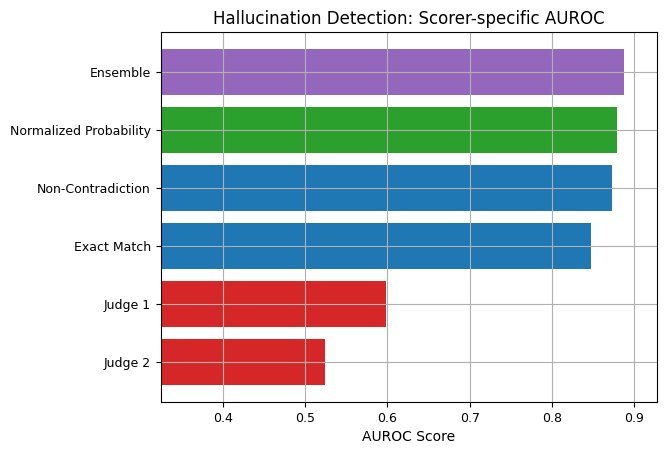

In [16]:
plot_ranked_auc(uq_result=test_results, correct_indicators=test_result_df["response_correct"].tolist(), fontsize=12)

#### 4.2 Filtered LLM Accuracy Evaluation

Here, we explore ‘filtered accuracy’ as a metric for evaluating the performance of our confidence scores. Filtered accuracy measures the change in LLM performance when responses with confidence scores below a specified threshold are excluded. By adjusting the confidence score threshold, we can observe how the accuracy of the LLM improves as less certain responses are filtered out.

We will plot the filtered accuracy across various confidence score thresholds to visualize the relationship between confidence and LLM accuracy. This analysis helps in understanding the trade-off between response coverage (measured by sample size below) and LLM accuracy, providing insights into the reliability of the LLM’s outputs.

Here, you can see the results for Ensemble scorer.

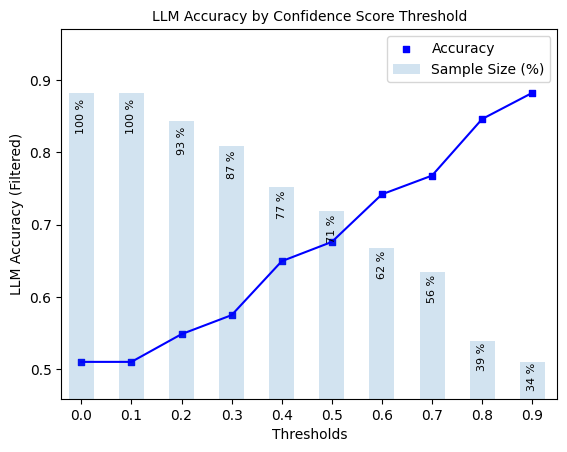

In [17]:
plot_model_accuracies(scores=test_result_df.ensemble_score, correct_indicators=test_result_df.response_correct, display_percentage=True)

#### 4.3 Precision, Recall, F1-Score of Hallucination Detection

Lastly, we compute the optimal threshold for binarizing confidence scores, using F1-score as the objective. Using this threshold, we compute precision, recall, and F1-score for black box scorer predictions of whether responses are correct.

In [19]:
# extract optimal threshold
best_threshold = uqe.thresh

# Define score vector and corresponding correct indicators (i.e. ground truth)
y_scores = test_result_df["ensemble_score"]  # confidence score
correct_indicators = (test_result_df.response_correct) * 1  # Whether responses is actually correct
y_pred = [(s > best_threshold) * 1 for s in y_scores]  # predicts whether response is correct based on confidence score
print(f"Ensemble F1-optimal threshold: {best_threshold}")

Ensemble F1-optimal threshold: 0.65


In [20]:
# print results
header = f"{'Metrics':<25}" + f"{'Ensemble':<25}"
print("=" * len(header) + "\n" + header + "\n" + "-" * len(header))
print(f"{'Precision':<25}{round(precision_score(y_true=correct_indicators, y_pred=y_pred), 3):<25})")
print(f"{'Recall':<25}{round(recall_score(y_true=correct_indicators, y_pred=y_pred), 3):<25}")
print(f"{'F1-score':<25}{round(f1_score(y_true=correct_indicators, y_pred=y_pred), 3):<25}")
print("-" * len(header))
print(f"{'F-1 optimal threshold':<25}{best_threshold:<25}")
print("=" * len(header))

Metrics                  Ensemble                 
--------------------------------------------------
Precision                0.754                    )
Recall                   0.902                    
F1-score                 0.821                    
--------------------------------------------------
F-1 optimal threshold    0.65                     


## 5. Scorer Definitions

### Black-Box Scorers
Black-Box UQ scorers exploit variation in LLM responses to the same prompt to measure semantic consistency. All scorers have outputs ranging from 0 to 1, with higher values indicating higher confidence. 

For a given prompt $x_i$, these approaches involves generating $m$ responses $\tilde{\mathbf{y}}_i = \{ \tilde{y}_{i1},...,\tilde{y}_{im}\}$, using a non-zero temperature, from the same prompt and comparing these responses to the original response $y_{i}$. We provide detailed descriptions of each below.

#### Exact Match Rate (`exact_match`)
Exact Match Rate (EMR) computes the proportion of candidate responses that are identical to the original response.
$$     EMR(y_i; \tilde{\mathbf{y}}_i) = \frac{1}{m} \sum_{j=1}^m \mathbb{I}(y_i=\tilde{y}_{ij}). $$

For more on this scorer, refer to [Cole et al., 2023](https://arxiv.org/abs/2305.14613).

#### Non-Contradiction Probability (`noncontradiction`)
Non-contradiction probability (NCP) computes the mean non-contradiction probability estimated by a natural language inference (NLI) model. This score is formally defined as follows:

\begin{equation}
    NCP(y_i; \tilde{\mathbf{y}}_i) = \frac{1}{m} \sum_{j=1}^m(1 - p_j)
\end{equation}
where

\begin{equation}
    p_j = \frac{\eta(y_{i}, \tilde{y}_{ij}) + \eta(\tilde{y}_{ij},y_i)}{2}.
\end{equation}

Above, $\eta(\tilde{y}_{ij},y_i)$ denotes the contradiction probability estimated by the NLI model for response $y_i$ and candidate $\tilde{y}_{ij}$. For more on this scorer, refer to [Chen & Mueller, 2023](https://arxiv.org/abs/2308.16175), [Lin et al., 2025](https://arxiv.org/abs/2305.19187), or [Manakul et al., 2023](https://arxiv.org/abs/2303.08896).

#### Normalized Semantic Negentropy (`semantic_negentropy`)
Normalized Semantic Negentropy (NSN) normalizes the standard computation of discrete semantic entropy to be increasing with higher confidence and have [0,1] support. In contrast to the EMR and NCP, semantic entropy does not distinguish between an original response and candidate responses. Instead, this approach computes a single metric value on a list of responses generated from the same prompt. Under this approach, responses are clustered using an NLI model based on mutual entailment. We consider the discrete version of SE, where the final set of clusters is defined  as follows:

\begin{equation}
    SE(y_i; \tilde{\mathbf{y}}_i) = - \sum_{C \in \mathcal{C}} P(C|y_i, \tilde{\mathbf{y}}_i)\log P(C|y_i, \tilde{\mathbf{y}}_i),
\end{equation}
where $P(C|y_i, \tilde{\mathbf{y}}_i)$ denotes the probability a randomly selected response $y \in \{y_i\} \cup \tilde{\mathbf{y}}_i $ belongs to cluster $C$, and $\mathcal{C}$ denotes the full set of clusters of $\{y_i\} \cup \tilde{\mathbf{y}}_i$.

To ensure that we have a normalized confidence score with $[0,1]$ support and with higher values corresponding to higher confidence, we implement the following normalization to arrive at *Normalized Semantic Negentropy* (NSN):
\begin{equation}
    NSN(y_i; \tilde{\mathbf{y}}_i) = 1 - \frac{SE(y_i; \tilde{\mathbf{y}}_i)}{\log m},
\end{equation}
where $\log m$ is included to normalize the support.

#### BERTScore (`bert_score`)
Let a tokenized text sequence be denoted as $\textbf{t} = \{t_1,...t_L\}$ and the corresponding contextualized word embeddings as $\textbf{E} = \{\textbf{e}_1,...,\textbf{e}_L\}$, where $L$ is the number of tokens in the text. The BERTScore precision, recall, and F1-scores between two tokenized texts  $\textbf{t}, \textbf{t}'$ are respectively defined as follows:

\begin{equation}
    BertP(\textbf{t}, \textbf{t}') = \frac{1}{| \textbf{t}|} \sum_{t \in \textbf{t}} \max_{t' \in \textbf{t}'} \textbf{e} \cdot \textbf{e}'
\end{equation}

\begin{equation}
    BertR(\textbf{t}, \textbf{t}') = \frac{1}{| \textbf{t}'|} \sum_{t' \in \textbf{t}'} \max_{t \in \textbf{t}} \textbf{e} \cdot \textbf{e}'
\end{equation}

\begin{equation}
    BertF(\textbf{t}, \textbf{t}') = 2\frac{ BertP(\textbf{t}, \textbf{t}')  BertR(\textbf{t}, \textbf{t}')}{BertPr(\textbf{t}, \textbf{t}')  + BertRec(\textbf{t}, \textbf{t}')},
\end{equation}
where $e, e'$ respectively correspond to $t, t'$. We compute our BERTScore-based confidence scores as follows:
\begin{equation}
    BertConfidence(y_i; \tilde{\mathbf{y}}_i) = \frac{1}{m} \sum_{j=1}^m BertF(y_i, \tilde{y}_{ij}),
\end{equation}
i.e. the average BERTScore F1 across pairings of the original response with all candidate responses. For more on BERTScore, refer to [Zheng et al., 2020](https://arxiv.org/abs/1904.09675).

#### Normalized Cosine Similarity (`cosine_sim`)
This scorer leverages a sentence transformer to map LLM outputs to an embedding space and measure similarity using those sentence embeddings. Let $V: \mathcal{Y} \xrightarrow{} \mathbb{R}^d$ denote the sentence transformer, where $d$ is the dimension of the embedding space. The average cosine similarity across pairings of the original response with all candidate responses is given as follows:

\begin{equation}
    CS(y_i; \tilde{\mathbf{y}}_i) = \frac{1}{m} \sum_{i=1}^m   \frac{\mathbf{V}(y_i) \cdot \mathbf{V}(\tilde{y}_{ij}) }{ \lVert \mathbf{V}(y_i) \rVert \lVert \mathbf{V}(\tilde{y}_{ij}) \rVert}.
\end{equation}

To ensure a standardized support of $[0, 1]$, we normalize cosine similarity to obtain confidence scores as follows:

\begin{equation}
    NCS(y_i; \tilde{\mathbf{y}}_i) = \frac{CS(y_i; \tilde{\mathbf{y}}_i) + 1}{2}.
\end{equation}

### BLEURT (`bleurt`) *Deprecated as of `v0.2.0`*
In contrast to the aforementioned scorers, BLEURT is specifically pre-trained and fine-tuned to learn human judgments of text similarity. Our BLEURT confidence score is the average BLEURT value across pairings of the original response with all candidate responses:

\begin{equation}
    BLEURTConfidence(y_i; \tilde{\mathbf{y}}_i) = \frac{1}{m} \sum_{j=1}^m BLEURT(y_i, \tilde{y}_{ij}).
\end{equation}

For more on this scorer, refer to [Sellam et al., 2020](https://arxiv.org/abs/2004.04696).


### White-Box UQ Scorers
White-box UQ scorers leverage token probabilities of the LLM's generated response to quantify uncertainty. All scorers have outputs ranging from 0 to 1, with higher values indicating higher confidence. We define two white-box UQ scorers below.

#### Length-Normalized Token Probability (`normalized_probability`)
Let the tokenization LLM response $y_i$ be denoted as $\{t_1,...,t_{L_i}\}$, where $L_i$ denotes the number of tokens the response. Length-normalized token probability (LNTP) computes a length-normalized analog of joint token probability:

\begin{equation}
    LNTP(y_i) = \prod_{t \in y_i}  p_t^{\frac{1}{L_i}},
\end{equation}
where $p_t$ denotes the token probability for token $t$. Note that this score is equivalent to the geometric mean of token probabilities for response $y_i$. For more on this scorer, refer to [Malinin & Gales, 2021](https://arxiv.org/pdf/2002.07650).


#### Minimum Token Probability (`min_probability`)
Minimum token probability (MTP) uses the minimum among token probabilities for a given responses as a confidence score:

\begin{equation}
    MTP(y_i) = \min_{t \in y_i}  p_t,
\end{equation}
where $t$ and $p_t$ follow the same definitions as above. For more on this scorer, refer to [Manakul et al., 2023](https://arxiv.org/abs/2303.08896).

### LLM-as-a-Judge Scorers
Under the LLM-as-a-Judge approach, either the same LLM that was used for generating the original responses or a different LLM is asked to form a judgment about a pre-generated response. Below, we define two LLM-as-a-Judge scorer templates. 
#### Categorical Judge Template (`true_false_uncertain`)
We follow the approach proposed by [Chen & Mueller, 2023](https://arxiv.org/abs/2308.16175) in which an LLM is instructed to score a question-answer concatenation as either  *incorrect*, *uncertain*, or *correct* using a carefully constructed prompt. These categories are respectively mapped to numerical scores of 0, 0.5, and 1. We denote the LLM-as-a-judge scorers as $J: \mathcal{Y} \xrightarrow[]{} \{0, 0.5, 1\}$. Formally, we can write this scorer function as follows:

\begin{equation}
J(y_i) = \begin{cases}
    0 & \text{LLM states response is incorrect} \\
    0.5 & \text{LLM states that it is uncertain} \\
    1 & \text{LLM states response is correct}.
\end{cases}
\end{equation}

#### Continuous Judge Template (`continuous`)
For the continuous template, the LLM is asked to directly score a question-answer concatenation's correctness on a scale of 0 to 1. 

© 2025 CVS Health and/or one of its affiliates. All rights reserved.